### Configuring dependencies

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_parquet(r"C:\Ayub Indra\Data Analyst\DSLS 2023\Mini Project Data Scientist\Datasets\final\final dataset.parquet")

In [3]:
df

,time,street,level,median_length,median_delay,median_speed_kmh,geometry
0,2022-07-06 00:00:00,Pahlawan,2,784.0,62.0,20.310001,"MULTILINESTRING ((106.797269 -6.608899, 106.79..."
1,2022-07-06 00:00:00,Tol Lingkar Luar Bogor,2,1314.0,63.0,37.710000,"LINESTRING (106.787027 -6.559782, 106.787701 -..."
2,2022-07-06 00:00:00,N8 Jalan Raya Sukabumi,3,379.0,117.5,8.594999,"MULTILINESTRING ((106.845486 -6.6594, 106.8454..."
3,2022-07-06 01:00:00,N9 Jalan Raya Pajajaran,2,808.0,73.0,19.920000,"LINESTRING (106.804346 -6.595963, 106.80472 -6..."
4,2022-07-06 01:00:00,Tol Lingkar Luar Bogor,1,2812.0,128.5,43.400000,"LINESTRING (106.787027 -6.559782, 106.787701 -..."
...,...,...,...,...,...,...,...
50664,2022-09-04 23:00:00,Kapten Yusuf,3,402.0,106.0,9.080000,"MULTILINESTRING ((106.787318 -6.614671, 106.78..."
50665,2022-09-06 00:00:00,N9 KS Tubun,2,327.0,67.0,9.620000,"MULTILINESTRING ((106.810069 -6.56609, 106.809..."
50666,2022-09-06 00:00:00,Tol Jagorawi,2,3377.0,116.0,39.030000,"LINESTRING (106.831594 -6.604101, 106.831608 -..."
50667,2022-09-06 00:00:00,N9 Jalan Raya Tajur,1,2625.0,107.5,29.235000,"LINESTRING (106.83008 -6.637004, 106.831101 -6..."


### Clustering

In [9]:
X = df.iloc[:, 3:6].to_numpy()
X

array([[ 784.      ,   62.      ,   20.310001],
       [1314.      ,   63.      ,   37.71    ],
       [ 379.      ,  117.5     ,    8.594999],
       ...,
       [3377.      ,  116.      ,   39.03    ],
       [2625.      ,  107.5     ,   29.235   ],
       [ 862.5     ,   77.5     ,   21.035   ]])

c:\Users\ayubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ayubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ayubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ayubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

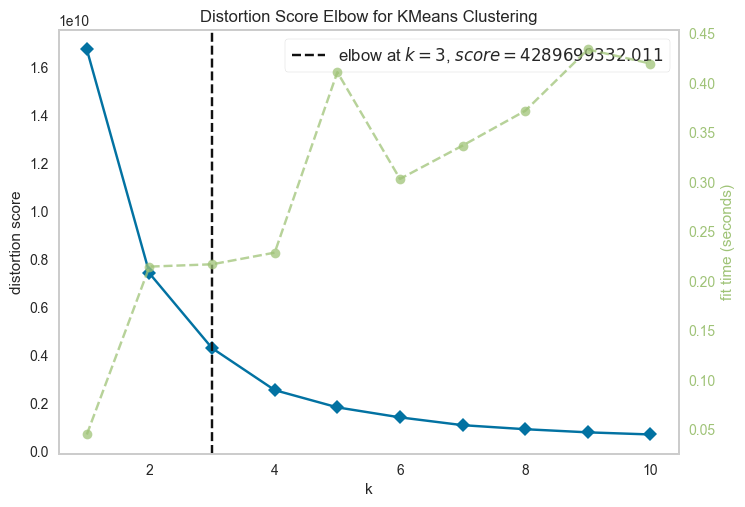

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [103]:
min_cluster = 1
max_cluster = 10

model = KElbowVisualizer(kmeans, k=(min_cluster, max_cluster+1))
model.fit(X)
model.show()

c:\Users\ayubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ayubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ayubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ayubi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

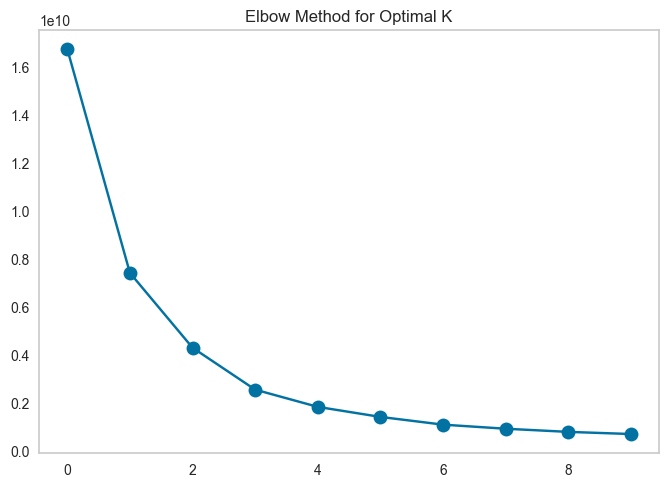

In [112]:
K = range(min_cluster, max_cluster+1)
SSE = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit(X)
    SSE.append(model.inertia_)
plt.title('Elbow Method for Optimal K')
plt.plot(SSE, marker='o', markersize=10)

In [104]:
cluster = KMeans(n_clusters=3, random_state=0, n_init="auto")
cluster.fit(X)
clusters = cluster.labels_ 
# print(len(clusters))
# cluster.cluster_centers_
df['Cluster'] = cluster.predict(X)

In [105]:
df.sample(5)

,time,street,level,median_length,median_delay,median_speed_kmh,geometry,Cluster
36150,2022-08-19 09:00:00,Kapten Yusuf,1,1037.0,69.5,18.320000,"MULTILINESTRING ((106.790893 -6.611648, 106.79...",1
24053,2022-08-04 12:00:00,Pemuda,1,1266.0,70.5,24.490000,"MULTILINESTRING ((106.796709 -6.581413, 106.79...",1
12949,2022-07-22 14:00:00,N9 Ir Haji Juanda,1,1485.0,69.0,27.610000,"MULTILINESTRING ((106.796766 -6.604173, 106.79...",1
48541,2022-09-02 21:00:00,Ciomas Raya,1,777.0,82.0,15.020000,"MULTILINESTRING ((106.767271 -6.602731, 106.76...",2
11811,2022-07-20 21:00:00,N9 Jalan Raya Tajur,1,1878.5,70.0,29.314999,"MULTILINESTRING ((106.835719 -6.640913, 106.83...",0


### Analysis

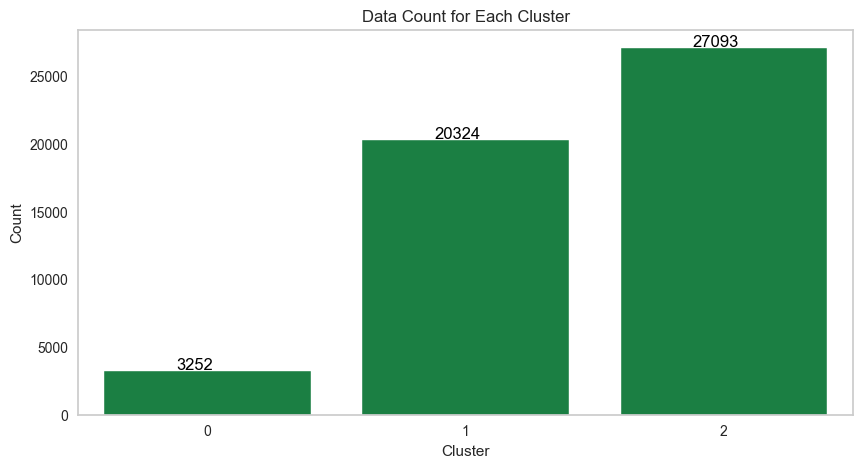

In [106]:
# Data Count for Each Cluster
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=df["Cluster"], color='#0a9040')
ax.set_title("Data Count for Each Cluster")
ax.set_ylabel("Count")
x_offset = -0.12
y_offset = 100
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0) 
    ax.annotate(val, 
                ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), 
                color='black')

In [107]:
numeric = ['median_length', 'median_delay', 'median_speed_kmh']

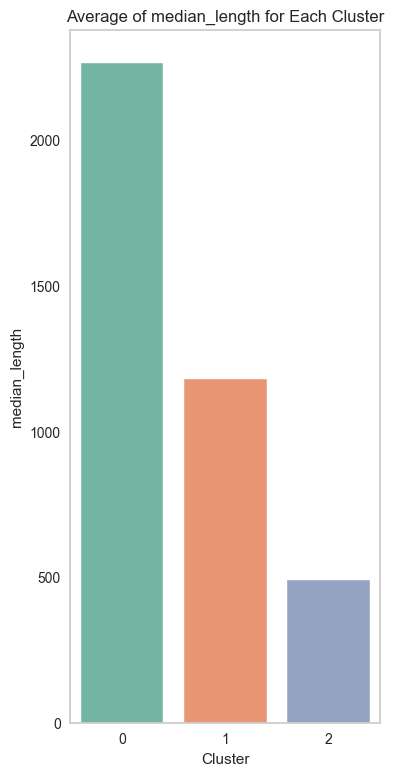

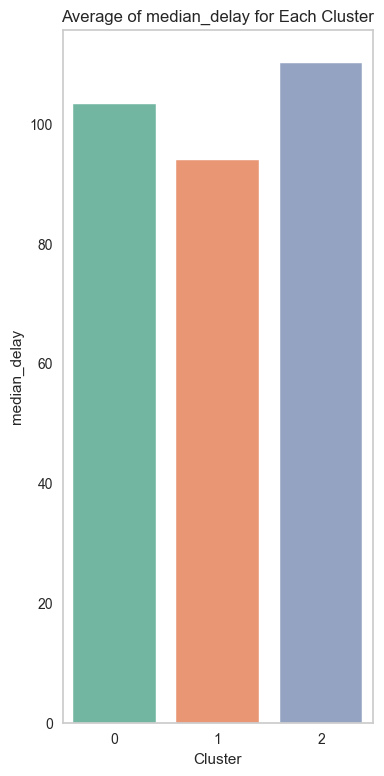

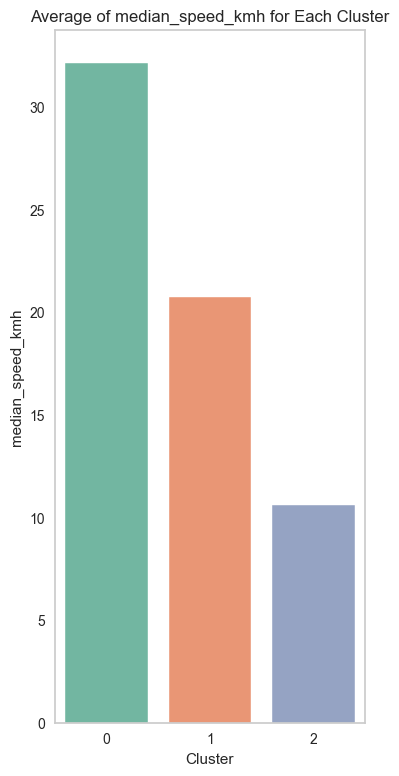

In [121]:
# Average Median Delay for Each Cluster
for n in numeric: 
    plt.figure(figsize=(4,9))
    sns.barplot(x="Cluster", y=n, data=df, estimator='mean', palette='Set2', errorbar=None)
    plt.title('Average of {} for Each Cluster'.format(n))
    plt.show()

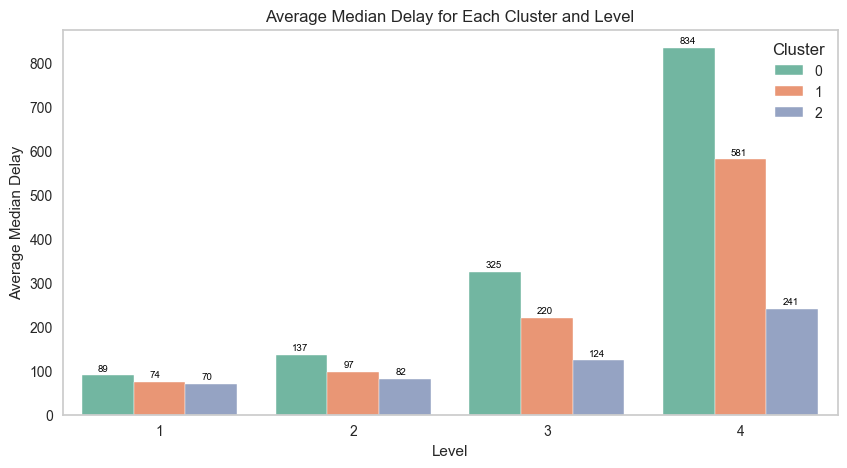

In [109]:
# Average Median Delay for Each Cluster and Level
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='level', y='median_delay', data=df, hue="Cluster", palette='Set2', errorbar=None)
ax.set_title("Average Median Delay for Each Cluster and Level")
ax.set_ylabel("Average Median Delay")
ax.set_xlabel("Level")
x_offset = -0.05
y_offset = 10
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0) 
    ax.annotate(val, 
                ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), 
                color='black',
                fontsize=7)